In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [84]:
metaDS = pd.read_csv("C:/Users/marci/Desktop/Projeto mestrado/Datasets/Batch 06.04/Treinamento WEKA ajustado/0604MLP.csv")
metaDSnp = metaDS.to_numpy()
print(metaDSnp)

[[6.34400e+01 4.75800e+01 3.62700e+01 ... 8.74827e+03 5.95400e+01
  1.00000e+00]
 [6.02100e+01 4.61300e+01 3.22400e+01 ... 8.08264e+03 5.44500e+01
  0.00000e+00]
 [6.03700e+01 4.50200e+01 3.44700e+01 ... 7.86603e+03 5.25700e+01
  1.00000e+00]
 ...
 [6.07400e+01 4.57600e+01 3.12700e+01 ... 8.05312e+03 5.41400e+01
  1.00000e+00]
 [6.14000e+01 4.84500e+01 3.19400e+01 ... 8.71996e+03 5.96900e+01
  1.00000e+00]
 [5.88100e+01 4.57000e+01 3.07900e+01 ... 7.84862e+03 5.27200e+01
  1.00000e+00]]


In [86]:
subset = np.empty((0,9))
values = []

for i in range(len(metaDSnp)):
    if int(metaDSnp[i][8]) == 0:
        subset = np.vstack((subset, metaDSnp[i]))

    if int(metaDSnp[i][8]) == 1:
        values.append(i)

aux = len(subset)
randomIndex = np.random.choice(values, aux, replace=False)

for j in range(len(randomIndex)):

    subset = np.vstack((subset, metaDSnp[randomIndex[j]]))

print(subset)
print(len(subset))


[[6.02100e+01 4.61300e+01 3.22400e+01 ... 8.08264e+03 5.44500e+01
  0.00000e+00]
 [6.34100e+01 4.68100e+01 3.42200e+01 ... 8.56250e+03 5.80000e+01
  0.00000e+00]
 [5.90100e+01 4.86700e+01 3.35400e+01 ... 8.52579e+03 5.82700e+01
  0.00000e+00]
 ...
 [6.18000e+01 4.72400e+01 3.11600e+01 ... 8.48852e+03 5.76500e+01
  1.00000e+00]
 [6.67000e+01 4.78300e+01 3.47400e+01 ... 9.13950e+03 6.24700e+01
  1.00000e+00]
 [6.15900e+01 4.50100e+01 3.34300e+01 ... 7.97798e+03 5.33500e+01
  1.00000e+00]]
2738


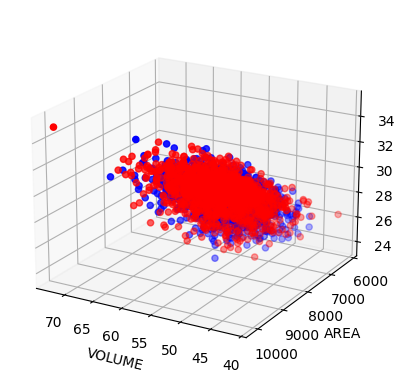

In [112]:
'''
    Coluna 0 - A
    Coluna 1 - B
    Coluna 2 - C
    Coluna 3 - D
    Coluna 4 - VOLUME
    Coluna 5 - AREA
    Coluna 6 - AREA FORMULA
    Coluna 7 - VOLUME FORMULA
    Coluna 8 - ECLODIU
'''

col1 = 4
col2 = 5
col3 = 3
col4 = 8

x = subset[:, col1]  # Primeira coluna
y = subset[:, col2]  # Segunda coluna
z = subset[:, col3]  # Terceira coluna
classe = subset[:, col4] # Coluna de classificação

# Criação do gráfico tridimensional
figure = plt.figure()
graph = figure.add_subplot(111, projection='3d')

graph.scatter(x[classe == 0], y[classe == 0], z[classe == 0], c='red', label='Não eclodiu')
graph.scatter(x[classe == 1], y[classe == 1], z[classe == 1], c='blue', label='Eclodiu')

# Adicionar rótulos
graph.set_xlabel(metaDS.columns[col1])
graph.set_ylabel(metaDS.columns[col2])
graph.set_zlabel(metaDS.columns[col3])

# Rotação da vizualização
graph.view_init(elev=20, azim=120) 

# Mostrar o gráfico
plt.show()